#### KPI REPORTING SCRIPT (VERSION 1)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
import scipy
import seaborn as sns

In [2]:
#Define your default path where the samples are located as a CSV file
path_samples = r'C:\Users\julli\OneDrive\Documentos\Deutshland\RWTH Aachen University\DDS Course\Summer Semester 23\Analytics Project\Notebooks Testing\JB Branch\KPI Code\Samples'
path_sample = os.path.join(path_samples, 'SampleB2.csv')

#Define your path to save KPI files

path_storage = r'C:\Users\julli\OneDrive\Escritorio\DP_DATA_TEST'

In [3]:
#Create dataframe based on first basic sample (This sample data is a simulated example)

df_sample_B = pd.read_csv(path_sample, sep = ',')
print(df_sample_B.dtypes)
df_sample_B.head()

No                                              int64
Region                                         object
district                                       object
day                                            object
shipment lvl in %                               int64
instance number(1 to N)                         int64
Total number of shipments(letter)               int64
Total number of shipments(parcels)              int64
Total number of shipments(other)                int64
Total number of shipments(total)                int64
Total number of post objects with shipments     int64
Total number of post objects                    int64
TSP sequence default                            int64
TSP sequence solver                             int64
TSP recalc                                      int64
dtype: object


,No,Region,district,day,shipment lvl in %,instance number(1 to N),Total number of shipments(letter),Total number of shipments(parcels),Total number of shipments(other),Total number of shipments(total),Total number of post objects with shipments,Total number of post objects,TSP sequence default,TSP sequence solver,TSP recalc
0,1,Warmsem,31600-1,Monday,100,1,44,64,30,138,50,98,20202,21389,16624
1,2,Warmsem,31600-1,Monday,100,2,42,68,31,141,49,98,20464,19974,19237
2,3,Warmsem,31600-1,Monday,100,3,43,65,32,140,48,98,20139,20318,19379
3,4,Warmsem,31600-1,Monday,100,4,46,69,30,145,53,98,18288,21168,18846
4,5,Warmsem,31600-1,Monday,100,5,42,63,31,136,49,98,19618,20751,17241


#### Using these are the column names in the sample table (If not verify for changes in code)


No: 0 <br>
Region: 1<br>
day: 2<br>
district: 3<br>
shipment lvl in %: 4<br>
instance number(1 to N): 5<br>
Total number of shipments(letter): 6<br>
Total number of shipments(parcels): 7<br>
Total number of shipments(other): 8<br>
Total number of shipments(total): 9<br>
Total number of post objects with shipments: 10<br>
Total number of post objects: 11<br>
TSP sequence default: 12<br>
TSP sequence solver: 13<br>
TSP recalc: 14
 

In [4]:
#Funtions that calculates KPI for a specific subset of DF needed (or specific instance) and stores the results 

def KPI_calculation(sample_df):
    
    #Indicate the name of the columns on the KPI table
    KPI_columns = ['N',
               'Avg Shipment per district',
               'Touching Rate',
               'Drop Factor',
               'Avg Distance DP',
               'Avg Distance Solver',
               'Avg Distance Recalc']


    #Create Dataframe
    df_KPI = pd.DataFrame(columns = KPI_columns)

    #Fill n values
    df_KPI['N'] = sample_df.iloc[:,5]

    #Fill average shipment per district
    df_KPI['Avg Shipment per district'] = sample_df.iloc[:,9].expanding().mean().round(2)

    #Fill touching Rate 
    df_KPI['Touching Rate'] = (sample_df.iloc[:,10]/sample_df.iloc[:,11]).expanding().mean().round(3)

    #Fill Drop Factor

    df_KPI['Drop Factor'] = (sample_df.iloc[:,9]/sample_df.iloc[:,10]).expanding().mean().round(3)

    #Fill Average Distances (DP Sequence, Solver Sequence, Recalculation)
    df_KPI['Avg Distance DP'] = sample_df.iloc[:,12].expanding().mean().round(2)
    df_KPI['Avg Distance Solver'] = sample_df.iloc[:,13].expanding().mean().round(2)
    df_KPI['Avg Distance Recalc'] = sample_df.iloc[:,14].expanding().mean().round(2)

    #Create a dictionary for every column in the KPI table
    dict_KPI =  {col: df_KPI[col].tolist() for col in df_KPI}

    return dict_KPI

Logical heriarchical structure for this code <br> 
(it can be changed in code mainly if day/district positions are switched when generating samples)

- Region 
    - District
        - Day 
            - Shipment Level 
                - N (sample or instance number)



In [5]:
#Function that loops through a sample table of all the instances with there N samples, 
#Computes and stores ALL the KPI evaluations in a dictionary as a pickle file

def KPI_storage(large_sample_df, path_store):

    #Define folder location of the pickle files
    dir_KPI = os.path.join(path_store, 'KPI_Folder')
    if not os.path.exists(dir_KPI):
        os.mkdir(dir_KPI)


    #Loop for extracting the subsets needed and reloop without repeating subsets until all are exhausted 
    
    region_list = large_sample_df['Region'].unique().tolist()
    for region in region_list:
        df_A = large_sample_df[large_sample_df['Region'] == region] 
        district_list = df_A['district'].unique().tolist()
        for district in district_list: 
            df_B = df_A[df_A['district'] == district]
            day_list = df_B['day'].unique().tolist()
            for day in day_list: 
                df_C = df_B[df_B['day'] == day] 
                shipment_level_list = df_C['shipment lvl in %'].unique().tolist()
                for level in shipment_level_list: 
                    df_D = df_C[df_C['shipment lvl in %'] == level]
                    
                    KPI_info = KPI_calculation(df_D)
                    pickle.dump(KPI_info, open(os.path.join(dir_KPI, 'KPI_'+region +'_'+ district + '_'+ day + '_' + str(level) + '.p'), 'wb'))



            

In [6]:
%%time
KPI_storage(large_sample_df= df_sample_B, path_store= path_storage)

CPU times: total: 0 ns
Wall time: 24.2 ms


In [7]:
#Checking how many KPI dictionary pickle files were generated and their description 

# List all files in the folder
files = os.listdir(os.path.join(path_storage, 'KPI_Folder'))

# Print the file names
for file in files:
    print(file)

KPI_Warmsem_31600-1_Monday_100.p
KPI_Warmsem_31600-1_Monday_90.p
KPI_Warmsem_31600-1_Tuesday_100.p
KPI_Warmsem_31600-2_Monday_100.p


In [8]:
#Load the KPIs for the N amount of trials of the speciific scenario wanted

kpi_path = os.path.join(path_storage, 'KPI_Folder', 'KPI_Warmsem_31600-1_Monday_100.p')


with open(kpi_path, 'rb') as file:
    kpi_data = pickle.load(file)

# Now, you can work with the loaded data

print(kpi_data.keys())
print(kpi_data)


dict_keys(['N', 'Avg Shipment per district', 'Touching Rate', 'Drop Factor', 'Avg Distance DP', 'Avg Distance Solver', 'Avg Distance Recalc'])
{'N': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'Avg Shipment per district': [138.0, 139.5, 139.67, 141.0, 140.0, 140.83, 141.29, 141.88, 141.22, 141.4, 141.73, 141.42, 140.69, 140.57, 140.2], 'Touching Rate': [0.51, 0.505, 0.5, 0.51, 0.508, 0.512, 0.512, 0.514, 0.518, 0.521, 0.52, 0.517, 0.515, 0.515, 0.514], 'Drop Factor': [2.76, 2.819, 2.851, 2.823, 2.813, 2.809, 2.819, 2.818, 2.784, 2.771, 2.783, 2.795, 2.792, 2.791, 2.785], 'Avg Distance DP': [20202.0, 20333.0, 20268.33, 19773.25, 19742.2, 19936.5, 19784.29, 19705.75, 19837.0, 19670.8, 19535.27, 19485.92, 19518.85, 19602.21, 19629.4], 'Avg Distance Solver': [21389.0, 20681.5, 20560.33, 20712.25, 20720.0, 20736.83, 20457.71, 20351.88, 20243.78, 20087.3, 19998.45, 20104.08, 20116.15, 19966.64, 20006.87], 'Avg Distance Recalc': [16624.0, 17930.5, 18413.33, 18521.5, 18265.4, 18560.17

In [9]:
#Funtion to display KPI graphs from loaded KPI pickle file

def KPI_graphs(kpi_file):

    #Create a DataFrame from the dictionary to easier use of the columns
    kpi_df = pd.DataFrame(kpi_file)

    # Get the number of columns in the DataFrame (excluding the first column)
    num_plots = len(kpi_df.columns) - 1

    # Create subplots
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 20), sharex=True)

    # Iterate through each column (excluding the first column) and plot the data
    for i, col in enumerate(kpi_df.columns[1:]):
        ax = axes[i] if num_plots > 1 else axes


        ax.plot(kpi_df['N'], kpi_df[col])
        ax.set_ylabel(col)

        # Show x-axis label for each subplot
        if i == num_plots - 1:
            ax.set_xlabel('N')


    # Adjust the spacing between subplots
    plt.tight_layout()

    # Add a general title for the subplots
    fig.suptitle('KPI CONVERGENCE PLOTS', y=1.005)

    # Display the plot 
    plt.show()
    

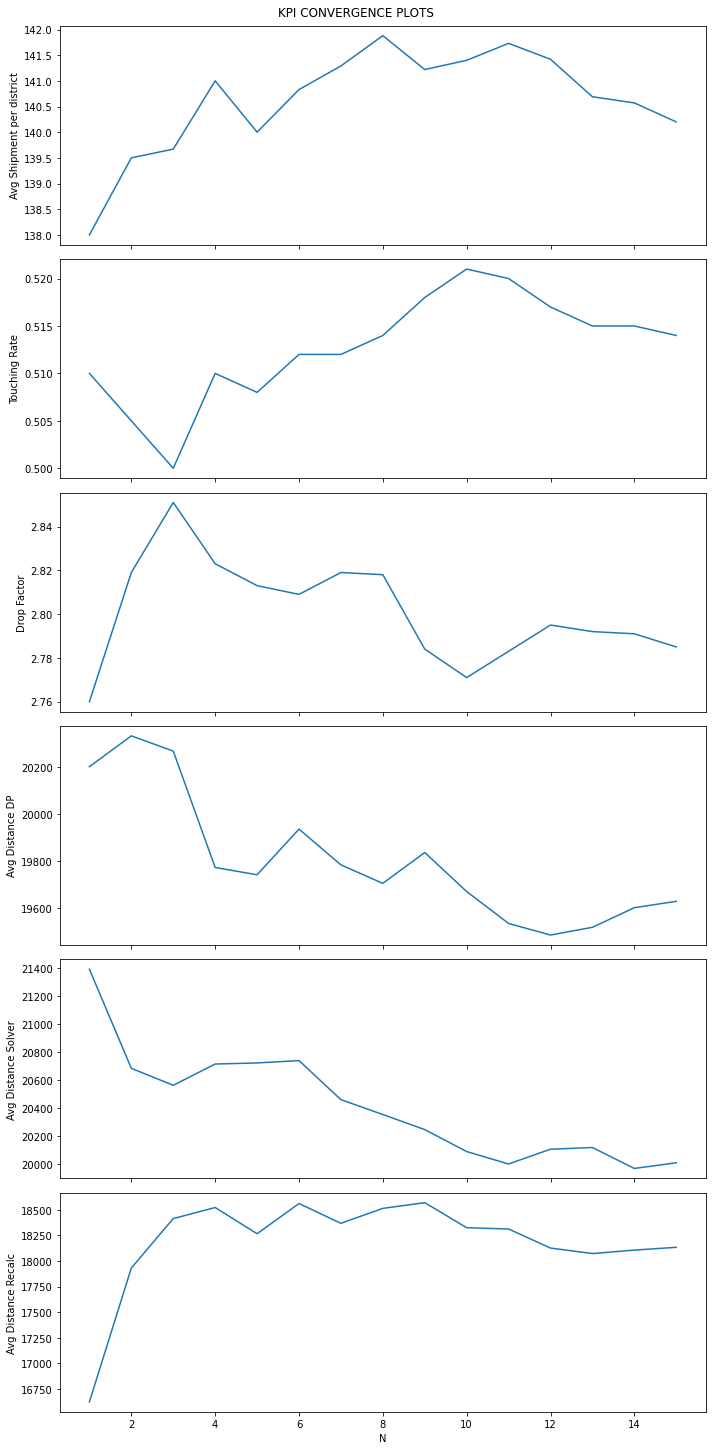

In [10]:
KPI_graphs(kpi_data)